<a href="https://colab.research.google.com/github/peiyulan/Text-Classification-in-Practice-From-Topic-Models-to-Transformers-/blob/main/Task1-LDA-spam-mail/Task1-LDA-News%20Classification.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>


# **Text Classification: Topic Modeling LDA​**


## Overview

We will learn the about the most widely used text classification model LDA through:

Introduction to LDA model (What and how does LDA model work)

Implementation of LDA model wiht Python:
- Activity 1: Text representation
- Activity 2: Training LDA model

Analysising your results
- Activity 3: Visualisation of text classification



---



# **Overview of Latent Dirichlet Allocation (LDA)**

![LDA.jpg](https://media.springernature.com/full/springer-static/image/chp%3A10.1007%2F978-981-19-3035-5_29/MediaObjects/520032_1_En_29_Fig3_HTML.png?as=webp)

# **Implementation of LDA**
---
### Steps
- Loading data and visualise data
- Prepare data for LDA analysis
- Training LDA model
- Analysing LDA model results

---

### Dataset
The datasets we will use today: BBC News Datasets (D. Greene and P. Cunningham. "Practical Solutions to the Problem of Diagonal Dominance in Kernel Document Clustering", Proc. ICML 2006. [PDF].)

The dataset was retrieved from BBC News, and has been widely used in machine-learning and traing text-classification models.
These datasets are made available for non-commercial and research purposes only.

The dataset contains 2225 news articles published between 2004-2005 on the BBC news website. Each article is labeled with one of the five topics: Politics, Business, Technology, Entertainment and Sport.


Source of dataset:
https://huggingface.co/datasets/SetFit/bbc-news

Other dataset to try:
https://www.kaggle.com/datasets/gowrishankarp/newspaper-text-summarization-cnn-dailymail?resource=download



---



# Import Python libriary

In [4]:
!pip install gensim
!pip install pyLDAvis
!pip install nltk

In [5]:
import nltk
nltk.download('punkt_tab')

[nltk_data] Downloading package punkt_tab to /root/nltk_data...
[nltk_data]   Package punkt_tab is already up-to-date!


True

# Loading data







In [6]:
import zipfile
import pandas as pd
import os

# Open the zip file
!wget https://github.com/DCS-training/Text-Calssification-in-Practice-From-Topic-Models-to-Transformers/raw/refs/heads/main/Task1-LDA-News%20Classification/LDA_data.zip
!unzip /content/LDA_data.zip


--2025-11-06 16:57:17--  https://github.com/DCS-training/Text-Calssification-in-Practice-From-Topic-Models-to-Transformers/raw/refs/heads/main/Task1-LDA-News%20Classification/LDA_data.zip
Resolving github.com (github.com)... 140.82.114.3
Connecting to github.com (github.com)|140.82.114.3|:443... connected.
HTTP request sent, awaiting response... 302 Found
Location: https://raw.githubusercontent.com/DCS-training/Text-Calssification-in-Practice-From-Topic-Models-to-Transformers/refs/heads/main/Task1-LDA-News%20Classification/LDA_data.zip [following]
--2025-11-06 16:57:18--  https://raw.githubusercontent.com/DCS-training/Text-Calssification-in-Practice-From-Topic-Models-to-Transformers/refs/heads/main/Task1-LDA-News%20Classification/LDA_data.zip
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 185.199.111.133, 185.199.108.133, 185.199.110.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|185.199.111.133|:443... connected.
HTTP request sent, awa

In [7]:
# Read the CSV file into a pandas DataFrame
file1 = "cnnnews_data.csv"
file2 = "BBCnews_data.csv"

data = pd.read_csv(file1)

In [8]:
# Print name of each column and numer of data points
print(data.info(verbose=True), "\n")

# Print the first 5 rows in the dataset
print(">>> The first 5 rows in the dataset")
print(data.head())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 11490 entries, 0 to 11489
Data columns (total 3 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   id          11490 non-null  object
 1   article     11490 non-null  object
 2   highlights  11490 non-null  object
dtypes: object(3)
memory usage: 269.4+ KB
None 

>>> The first 5 rows in the dataset
                                         id  \
0  92c514c913c0bdfe25341af9fd72b29db544099b   
1  2003841c7dc0e7c5b1a248f9cd536d727f27a45a   
2  91b7d2311527f5c2b63a65ca98d21d9c92485149   
3  caabf9cbdf96eb1410295a673e953d304391bfbb   
4  3da746a7d9afcaa659088c8366ef6347fe6b53ea   

                                             article  \
0  Ever noticed how plane seats appear to be gett...   
1  A drunk teenage boy had to be rescued by secur...   
2  Dougie Freedman is on the verge of agreeing a ...   
3  Liverpool target Neto is also wanted by PSG an...   
4  Bruce Jenner will break his silence in a 

# Visualise data with wordcloud

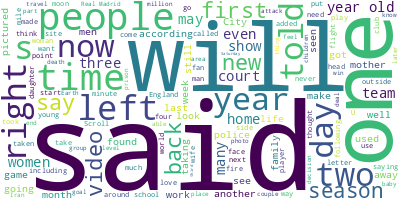

In [9]:
# Import the wordcloud library
from wordcloud import WordCloud

# Randomly select 100 articles and join them together (for faster processing)
long_string = ','.join(list(data['article'].sample(100).values))

# Create a WordCloud object
wordcloud = WordCloud(background_color="white", max_words=1000, contour_width=3, contour_color='steelblue')

# Generate a word cloud
wordcloud.generate(long_string)

# Visualize the word cloud
wordcloud.to_image()



---



# Prepare data for LDA analysis

Before we can use the LDA model, data needs to be processed and transformed in a format that can be use as an input for LAD model, these steps inclues:

1. Tokenize the text
2. Remove stopwords
3. Convert the tokenized object into a corpus and dictionary

## 01 - Tokenization

Tokenisers work by splitting text into smaller components, or the unit for analysis.

- For example, an article can be split into sentences, or words, depending on the purpose of your analysis.

This is usually done by identifyin the "separator"  or "delimiter" in the data.

- For example, the " "(blank space) between words in a sentence, or the ","(comma) or "." (period)

In our case, as we are not interested in analysing punctuation, we will first remove punctuation marks and choose " " as the diameter to tokenise or data.

In [9]:
# Load the Regex (regular expression) library to clean up the data
import re

# Remove punctuation
article = data['article']
cleaned_article = article.map(lambda x: re.sub('[,\.!?]', '', x)) # Search for each row of data, and replace "[,\.!?]", with "" (nothing)
cleaned_article = cleaned_article.map(lambda x: x.lower()) # Make everything letter lower-case.

<>:6: SyntaxWarning: invalid escape sequence '\.'
<>:6: SyntaxWarning: invalid escape sequence '\.'
/tmp/ipython-input-3362886169.py:6: SyntaxWarning: invalid escape sequence '\.'
  cleaned_article = article.map(lambda x: re.sub('[,\.!?]', '', x)) # Search for each row of data, and replace "[,\.!?]", with "" (nothing)


In [10]:
print("Original article:")
print(article[0], "\n")
print("Article after removing punctuation:")
print(cleaned_article[0])

Original article:
Ever noticed how plane seats appear to be getting smaller and smaller? With increasing numbers of people taking to the skies, some experts are questioning if having such packed out planes is putting passengers at risk. They say that the shrinking space on aeroplanes is not only uncomfortable - it's putting our health and safety in danger. More than squabbling over the arm rest, shrinking space on planes putting our health and safety in danger? This week, a U.S consumer advisory group set up by the Department of Transportation said at a public hearing that while the government is happy to set standards for animals flying on planes, it doesn't stipulate a minimum amount of space for humans. 'In a world where animals have more rights to space and food than humans,' said Charlie Leocha, consumer representative on the committee. 'It is time that the DOT and FAA take a stand for humane treatment of passengers.' But could crowding on planes lead to more serious issues than f

In [12]:
# Tokenization
from nltk.tokenize import sent_tokenize, word_tokenize

text = "a set of words that is complete in itself, typically containing a subject and predicate. A sentence conveys a statement, question, exclamation, or command, and consisting of a main clause and sometimes one or more subordinate clauses."#example_sentence
print("Use sent_tokenize to split data into sentences")
print(sent_tokenize(text)) # nltk.tokenize.sent_tokenize(text, language='english')

print("Use word_tokenize to split data into sentences")
print(word_tokenize(text))

Use sent_tokenize to split data into sentences
['a set of words that is complete in itself, typically containing a subject and predicate.', 'A sentence conveys a statement, question, exclamation, or command, and consisting of a main clause and sometimes one or more subordinate clauses.']
Use word_tokenize to split data into sentences
['a', 'set', 'of', 'words', 'that', 'is', 'complete', 'in', 'itself', ',', 'typically', 'containing', 'a', 'subject', 'and', 'predicate', '.', 'A', 'sentence', 'conveys', 'a', 'statement', ',', 'question', ',', 'exclamation', ',', 'or', 'command', ',', 'and', 'consisting', 'of', 'a', 'main', 'clause', 'and', 'sometimes', 'one', 'or', 'more', 'subordinate', 'clauses', '.']


> Question: What's the difference between tokeniser and split?

In [13]:
print(word_tokenize(text))
print(text.split(" "))

['a', 'set', 'of', 'words', 'that', 'is', 'complete', 'in', 'itself', ',', 'typically', 'containing', 'a', 'subject', 'and', 'predicate', '.', 'A', 'sentence', 'conveys', 'a', 'statement', ',', 'question', ',', 'exclamation', ',', 'or', 'command', ',', 'and', 'consisting', 'of', 'a', 'main', 'clause', 'and', 'sometimes', 'one', 'or', 'more', 'subordinate', 'clauses', '.']
['a', 'set', 'of', 'words', 'that', 'is', 'complete', 'in', 'itself,', 'typically', 'containing', 'a', 'subject', 'and', 'predicate.', 'A', 'sentence', 'conveys', 'a', 'statement,', 'question,', 'exclamation,', 'or', 'command,', 'and', 'consisting', 'of', 'a', 'main', 'clause', 'and', 'sometimes', 'one', 'or', 'more', 'subordinate', 'clauses.']


Now let's use the method above to tokenise the dataset "news["cleaned_article"]"

In [14]:
tokenised_articles = [word_tokenize(article) for article in cleaned_article]

### 02- Remove stopwords

Stop words are commonly used words. In English, for example, "the" , "is", "what", are all stopwords.

As these words do not carry much information of meaning in a sentence, they are usually excluded from the data to achieve a better analysis result.

In [15]:
import gensim    # open source Python library for text processing
from gensim.utils import simple_preprocess
import nltk      # natual language processing tool kit
from nltk.corpus import stopwords

nltk.download('stopwords')
stop_words = stopwords.words('english')
customised_stopwords = ['from', 'mr', 'edu', 'use'] # You can add your own stopwords
stop_words.extend(customised_stopwords)

# function for removing stop words
def remove_stopwords(texts):
    return [[word for word in simple_preprocess(str(doc))
             if word not in stop_words] for doc in texts]

tokenised_articles_no_stopwords = remove_stopwords(tokenised_articles)

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


In [16]:
print(cleaned_article[0], "\n") # Original article
print(tokenised_articles[0], "\n") # Tokenised article
print(tokenised_articles_no_stopwords[0], "\n") # Tokenised article without stopwords

ever noticed how plane seats appear to be getting smaller and smaller with increasing numbers of people taking to the skies some experts are questioning if having such packed out planes is putting passengers at risk they say that the shrinking space on aeroplanes is not only uncomfortable - it's putting our health and safety in danger more than squabbling over the arm rest shrinking space on planes putting our health and safety in danger this week a us consumer advisory group set up by the department of transportation said at a public hearing that while the government is happy to set standards for animals flying on planes it doesn't stipulate a minimum amount of space for humans 'in a world where animals have more rights to space and food than humans' said charlie leocha consumer representative on the committee 'it is time that the dot and faa take a stand for humane treatment of passengers' but could crowding on planes lead to more serious issues than fighting for space in the overhea

### 03- Text representation: Bag of words (BOW)

The last step of text processing is turning textual data into numerical format. In our case, we want to turn a news article into a series of numbers that represent the article.

One of the most common way to do this is "bag-of-words" or BOW.

It works by creating a vocabulary of all unique words in a collection of documents and then representing each document as a vector of word counts.

For example:
- Tokens: {banana, apple, walk, on, the, street, dog}
- Sentence 1 vector: {banana: 2, apple: 1, walk: 1, on: 1, the: 1, street: 1, dog: 1}
- Sentence 2 vector: {banana: 1, apple: 0, walk: 1, on: 1, the: 2, street: 1, dog: 0}


This represenation ignore the order and grammatical relationship between words, and simply count the number of appearance (frequency) of a given word in the text. It is commonly used in text classification or compare similarity between documents.

In general, this model works better on longer

In [17]:
import gensim.corpora as corpora

# Create Dictionary
# This assign an index to each token (word)
id2word = corpora.Dictionary(tokenised_articles_no_stopwords)

for index in id2word.keys()[:10]:
    print(index, id2word[index])

0 administration
1 advisory
2 aeroplanes
3 air
4 airlines
5 airways
6 amount
7 animals
8 appear
9 arm


In [18]:
# turn each article into "Bag of words"
corpus = [id2word.doc2bow(document) for document in tokenised_articles_no_stopwords]

# View
print(corpus[0])
print(corpus[1])

[(0, 1), (1, 1), (2, 1), (3, 2), (4, 7), (5, 1), (6, 1), (7, 2), (8, 1), (9, 1), (10, 1), (11, 1), (12, 1), (13, 1), (14, 1), (15, 1), (16, 1), (17, 1), (18, 2), (19, 1), (20, 2), (21, 1), (22, 1), (23, 1), (24, 1), (25, 1), (26, 2), (27, 2), (28, 1), (29, 1), (30, 1), (31, 1), (32, 1), (33, 2), (34, 1), (35, 1), (36, 1), (37, 2), (38, 1), (39, 1), (40, 1), (41, 1), (42, 1), (43, 1), (44, 1), (45, 1), (46, 1), (47, 1), (48, 1), (49, 1), (50, 2), (51, 1), (52, 1), (53, 1), (54, 2), (55, 1), (56, 11), (57, 1), (58, 1), (59, 1), (60, 1), (61, 1), (62, 1), (63, 1), (64, 1), (65, 1), (66, 1), (67, 1), (68, 1), (69, 1), (70, 1), (71, 1), (72, 2), (73, 1), (74, 1), (75, 1), (76, 3), (77, 1), (78, 5), (79, 2), (80, 6), (81, 2), (82, 1), (83, 3), (84, 1), (85, 1), (86, 1), (87, 1), (88, 1), (89, 1), (90, 1), (91, 1), (92, 1), (93, 1), (94, 2), (95, 2), (96, 1), (97, 5), (98, 5), (99, 1), (100, 2), (101, 1), (102, 2), (103, 1), (104, 2), (105, 6), (106, 1), (107, 1), (108, 1), (109, 2), (110, 1)



---



# Train LDA model

Documentation of the gensim LDA model: https://radimrehurek.com/gensim/models/ldamodel.html

Let's try the most basic function using LdaMulticore

In [19]:
from pprint import pprint

# number of topics
num_topics = 5

# Build LDA model
lda_model = gensim.models.LdaMulticore(corpus=corpus,
                                       id2word=id2word,
                                       num_topics=num_topics)

# Print the Keyword in the 10 topics
pprint(lda_model.print_topics())
doc_lda = lda_model[corpus]

[(0,
  '0.014*"said" + 0.005*"one" + 0.004*"year" + 0.004*"would" + 0.004*"people" '
  '+ 0.004*"two" + 0.003*"told" + 0.003*"old" + 0.003*"also" + 0.003*"new"'),
 (1,
  '0.007*"said" + 0.005*"one" + 0.004*"first" + 0.004*"year" + 0.004*"also" + '
  '0.004*"time" + 0.003*"two" + 0.003*"old" + 0.003*"last" + 0.003*"new"'),
 (2,
  '0.010*"said" + 0.004*"one" + 0.004*"year" + 0.004*"people" + 0.004*"also" + '
  '0.003*"new" + 0.003*"years" + 0.003*"two" + 0.003*"would" + 0.003*"told"'),
 (3,
  '0.006*"league" + 0.005*"season" + 0.005*"said" + 0.005*"year" + '
  '0.005*"last" + 0.004*"one" + 0.004*"team" + 0.004*"city" + 0.004*"first" + '
  '0.004*"time"'),
 (4,
  '0.012*"said" + 0.006*"police" + 0.005*"year" + 0.004*"would" + 0.004*"one" '
  '+ 0.003*"two" + 0.003*"also" + 0.003*"last" + 0.003*"people" + '
  '0.003*"first"')]


# Analyse the trained LDA model

In [32]:
import pyLDAvis.gensim_models as gensimvis
import pickle
import pyLDAvis

# Visualize the topics
pyLDAvis.enable_notebook()

LDAvis_data_filepath = os.path.join('./results/ldavis_prepared_'+str(num_topics))

LDAvis_prepared = gensimvis.prepare(lda_model, corpus, id2word)
LDAvis_prepared

/usr/local/lib/python3.12/dist-packages/jupyter_client/session.py:203: DeprecationWarning: datetime.datetime.utcnow() is deprecated and scheduled for removal in a future version. Use timezone-aware objects to represent datetimes in UTC: datetime.datetime.now(datetime.UTC).
  return datetime.utcnow().replace(tzinfo=utc)


PreparedData(topic_coordinates=              x         y  topics  cluster       Freq
topic                                                
3     -0.022861 -0.021863       1        1  24.772262
0     -0.032472 -0.000950       2        1  21.223216
2      0.066747 -0.002925       3        1  19.834799
1     -0.014509  0.023579       4        1  19.155299
4      0.003095  0.002159       5        1  15.014424, topic_info=           Term          Freq         Total Category  logprob  loglift
323      league   5736.000000   5736.000000  Default  30.0000  30.0000
357      season   5576.000000   5576.000000  Default  29.0000  29.0000
95         said  42602.000000  42602.000000  Default  28.0000  28.0000
229        club   4385.000000   4385.000000  Default  27.0000  27.0000
325   liverpool   2588.000000   2588.000000  Default  26.0000  26.0000
...         ...           ...           ...      ...      ...      ...
650         get   1242.400433   7885.686465   Topic5  -6.2553   0.0482
824       three   1329.388551   9031.896085   Topic5  -6.1877  -0.0199
503        left   1402.635210  10406.515765   Topic5  -6.1340  -0.1079
188         old   1317.095333  11320.440943   Topic5  -6.1970  -0.2550
1123      years   1134.689287  11336.724029   Topic5  -6.3460  -0.4055

[524 rows x 6 columns], token_table=       Topic      Freq      Term
term                            
1732       1  0.560911     abuse
1732       2  0.135750     abuse
1732       3  0.083901     abuse
1732       4  0.136692     abuse
1732       5  0.082958     abuse
...      ...       ...       ...
30918      3  0.023050       yum
30918      4  0.046100       yum
30918      5  0.069149       yum
25257      1  0.058897  zbigniew
25257      2  0.883450  zbigniew

[1663 rows x 3 columns], R=30, lambda_step=0.01, plot_opts={'xlab': 'PC1', 'ylab': 'PC2'}, topic_order=[4, 1, 3, 2, 5])

/usr/local/lib/python3.12/dist-packages/jupyter_client/session.py:203: DeprecationWarning: datetime.datetime.utcnow() is deprecated and scheduled for removal in a future version. Use timezone-aware objects to represent datetimes in UTC: datetime.datetime.now(datetime.UTC).
  return datetime.utcnow().replace(tzinfo=utc)
/usr/local/lib/python3.12/dist-packages/jupyter_client/session.py:203: DeprecationWarning: datetime.datetime.utcnow() is deprecated and scheduled for removal in a future version. Use timezone-aware objects to represent datetimes in UTC: datetime.datetime.now(datetime.UTC).
  return datetime.utcnow().replace(tzinfo=utc)
/usr/local/lib/python3.12/dist-packages/jupyter_client/session.py:203: DeprecationWarning: datetime.datetime.utcnow() is deprecated and scheduled for removal in a future version. Use timezone-aware objects to represent datetimes in UTC: datetime.datetime.now(datetime.UTC).
  return datetime.utcnow().replace(tzinfo=utc)


## Specify arguements in LDA model

In [23]:
id2word = corpora.Dictionary(tokenised_articles_no_stopwords)
id2word.filter_extremes(
#   no_below=5,    # Keep tokens which are in at least 5 documents
    no_above=0.5,  # Keep tokens which are in no more than 50% of the documents (fraction)
    keep_n=10000  # Keep only the first 100,000 most frequent tokens (optional, for memory control)
)
corpus = [id2word.doc2bow(document) for document in tokenised_articles_no_stopwords]



In [21]:
from pprint import pprint

num_topics = 6

# Build LDA model
lda_model = gensim.models.ldamulticore.LdaMulticore(corpus=corpus,
                                           id2word=id2word,
                                           num_topics= num_topics,
                                           random_state=100,
                                           chunksize=10,
                                           passes=10,
                                           alpha='symmetric',
                                           iterations=100,
                                           per_word_topics=True)


In [24]:
import pyLDAvis.gensim_models as gensimvis
import pickle
import pyLDAvis

# Print the Keyword in each topic
pprint(lda_model.print_topics())
doc_lda = lda_model[corpus]

# Visualize the topics
pyLDAvis.enable_notebook()
LDAvis_data_filepath = os.path.join('./results/ldavis_prepared_'+str(num_topics))

# # this is a bit time consuming - make the if statement True
LDAvis_prepared = gensimvis.prepare(lda_model, corpus, id2word)
LDAvis_prepared

[(0,
  '0.021*"police" + 0.009*"found" + 0.009*"family" + 0.008*"hospital" + '
  '0.008*"man" + 0.008*"old" + 0.007*"told" + 0.007*"home" + 0.007*"car" + '
  '0.007*"video"'),
 (1,
  '0.012*"new" + 0.006*"world" + 0.005*"water" + 0.005*"million" + '
  '0.004*"show" + 0.004*"around" + 0.004*"video" + 0.003*"like" + 0.003*"top" '
  '+ 0.003*"first"'),
 (2,
  '0.014*"court" + 0.007*"president" + 0.007*"us" + 0.006*"state" + '
  '0.006*"told" + 0.006*"former" + 0.005*"according" + 0.005*"cnn" + '
  '0.004*"police" + 0.004*"years"'),
 (3,
  '0.012*"league" + 0.012*"season" + 0.010*"team" + 0.008*"game" + '
  '0.008*"club" + 0.007*"united" + 0.007*"players" + 0.007*"city" + '
  '0.006*"first" + 0.006*"england"'),
 (4,
  '0.011*"people" + 0.010*"per" + 0.008*"cent" + 0.006*"could" + '
  '0.006*"labour" + 0.005*"uk" + 0.005*"party" + 0.004*"miliband" + '
  '0.004*"years" + 0.004*"million"'),
 (5,
  '0.007*"get" + 0.006*"first" + 0.006*"day" + 0.006*"like" + 0.006*"life" + '
  '0.006*"years" + 

/usr/local/lib/python3.12/dist-packages/jupyter_client/session.py:203: DeprecationWarning: datetime.datetime.utcnow() is deprecated and scheduled for removal in a future version. Use timezone-aware objects to represent datetimes in UTC: datetime.datetime.now(datetime.UTC).
  return datetime.utcnow().replace(tzinfo=utc)
/usr/local/lib/python3.12/dist-packages/jupyter_client/session.py:203: DeprecationWarning: datetime.datetime.utcnow() is deprecated and scheduled for removal in a future version. Use timezone-aware objects to represent datetimes in UTC: datetime.datetime.now(datetime.UTC).
  return datetime.utcnow().replace(tzinfo=utc)
/usr/local/lib/python3.12/dist-packages/jupyter_client/session.py:203: DeprecationWarning: datetime.datetime.utcnow() is deprecated and scheduled for removal in a future version. Use timezone-aware objects to represent datetimes in UTC: datetime.datetime.now(datetime.UTC).
  return datetime.utcnow().replace(tzinfo=utc)
/usr/local/lib/python3.12/dist-packag

PreparedData(topic_coordinates=              x         y  topics  cluster       Freq
topic                                                
5     -0.090347  0.144792       1        1  26.990875
4     -0.027191 -0.104327       2        1  17.059613
3     -0.242073  0.164321       3        1  15.949435
1     -0.097672 -0.307116       4        1  14.334723
0      0.187684  0.092316       5        1  13.350370
2      0.269599  0.010014       6        1  12.314984, topic_info=          Term          Freq         Total Category  logprob  loglift
159     police  12225.000000  12225.000000  Default  30.0000  30.0000
980      court   6222.000000   6222.000000  Default  29.0000  29.0000
276     league   6795.000000   6795.000000  Default  28.0000  28.0000
305     season   6662.000000   6662.000000  Default  27.0000  27.0000
687        per   5873.000000   5873.000000  Default  26.0000  26.0000
...        ...           ...           ...      ...      ...      ...
951      years   1849.491425  11649.276261   Topic6  -5.4799   0.2540
1027       men   1407.061552   3116.160529   Topic6  -5.7533   1.2993
206        new   1502.062052  11766.458718   Topic6  -5.6880   0.0359
72    reported   1314.206803   3070.574574   Topic6  -5.8216   1.2457
123      death   1288.180284   3690.620416   Topic6  -5.8416   1.0418

[383 rows x 6 columns], token_table=      Topic      Freq       Term
term                            
1453      6  0.999475      abuse
3399      4  0.998663   accident
227       2  0.134727  according
227       4  0.105871  according
227       5  0.324179  according
...     ...       ...        ...
951       3  0.037856      years
951       4  0.079919      years
951       6  0.158722      years
2560      4  0.545394       york
2560      6  0.454428       york

[654 rows x 3 columns], R=30, lambda_step=0.01, plot_opts={'xlab': 'PC1', 'ylab': 'PC2'}, topic_order=[6, 5, 4, 2, 1, 3])

/usr/local/lib/python3.12/dist-packages/jupyter_client/session.py:203: DeprecationWarning: datetime.datetime.utcnow() is deprecated and scheduled for removal in a future version. Use timezone-aware objects to represent datetimes in UTC: datetime.datetime.now(datetime.UTC).
  return datetime.utcnow().replace(tzinfo=utc)
/usr/local/lib/python3.12/dist-packages/jupyter_client/session.py:203: DeprecationWarning: datetime.datetime.utcnow() is deprecated and scheduled for removal in a future version. Use timezone-aware objects to represent datetimes in UTC: datetime.datetime.now(datetime.UTC).
  return datetime.utcnow().replace(tzinfo=utc)
/usr/local/lib/python3.12/dist-packages/jupyter_client/session.py:203: DeprecationWarning: datetime.datetime.utcnow() is deprecated and scheduled for removal in a future version. Use timezone-aware objects to represent datetimes in UTC: datetime.datetime.now(datetime.UTC).
  return datetime.utcnow().replace(tzinfo=utc)


In [ ]:
def format_topics_sentences(ldamodel=None, corpus=corpus, texts=data):
    # Init output
    sent_topics_df = pd.DataFrame()
    topic = []
    prop= []
    keywords = []

    # Get main topic in each document
    for i, row_list in enumerate(ldamodel[corpus]):
        row = row_list[0] if ldamodel.per_word_topics else row_list
        # print(row)
        row = sorted(row, key=lambda x: (x[1]), reverse=True)
        # Get the Dominant topic, Perc Contribution and Keywords for each document
        for j, (topic_num, prop_topic) in enumerate(row):
            if j == 0:  # => dominant topic
                wp = ldamodel.show_topic(topic_num)
                topic_keywords = ", ".join([word for word, prop in wp])
                topic.append(int(topic_num))
                prop.append(round(prop_topic,4))
                keywords.append(topic_keywords)
            else:
                break
    sent_topics_df['Dominant_Topic'] = topic
    sent_topics_df['Perc_Contribution'] =prop
    sent_topics_df['Topic_Keywords']=keywords
    # Add original text to the end of the output
    contents = pd.Series(texts)
    sent_topics_df = pd.concat([sent_topics_df, contents], axis=1)
    return(sent_topics_df)


df_topic_sents_keywords = format_topics_sentences(ldamodel=lda_model, corpus=corpus, texts=tokenised_articles_no_stopwords)

# Format
df_dominant_topic = df_topic_sents_keywords.reset_index()
#df_dominant_topic.columns = ['Document_No', 'Dominant_Topic', 'Topic_Perc_Contrib', 'Keywords', 'Text']


In [ ]:
df_dominant_topic.head(10)



---



# **Resources List**

**Tutorials**
Different ways to visualise results of LDA analysis:https://www.machinelearningplus.com/nlp/topic-modeling-visualization-how-to-present-results-lda-models/

